# **数据**

In [ ]:
from google.colab import drive # 从 google.colab 模块导入 drive 子模块
drive.mount('/content/drive') # 将你的 Google Drive 挂载到 Colab 的 '/content/drive' 目录下

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/ # 列出 Google Drive 中 'MyDrive' 文件夹下的所有文件和文件夹

 AI				        Predictive_Modeling_for_Energy_Usage001
'Colab Notebooks'		        Predictive_Modeling_for_Energy_Usage2
 Predictive_Modeling_for_Energy_Usage   未来预测


In [ ]:
%cd /content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage
# 将当前工作目录切换到 Google Drive 中的 'Predictive_Modeling_for_Energy_Usage' 文件夹

/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage


In [ ]:
import pandas as pd # 导入 pandas 库，并将其命名为 pd，用于数据处理和分析
import numpy as np # 导入 numpy 库，并将其命名为 np，用于数值计算
import matplotlib.pyplot as plt # 导入 matplotlib.pyplot 模块，并将其命名为 plt，用于绘图
import seaborn as sns # 导入 seaborn 库，并将其命名为 sns，用于绘制更美观的统计图表
from sklearn.preprocessing import MinMaxScaler # 从 sklearn.preprocessing 模块导入 MinMaxScaler 类，用于数据归一化
from keras.models import Sequential # 从 keras.models 模块导入 Sequential 类，用于构建神经网络模型
from keras.layers import LSTM, Dense, Dropout # 从 keras.layers 模块导入 LSTM、Dense、Dropout 类，用于构建神经网络层
from sklearn.metrics import mean_squared_error # 从 sklearn.metrics 模块导入 mean_squared_error 函数，用于计算均方误差
import math # 导入 math 模块，用于数学运算
import warnings # 导入 warnings 模块，用于处理警告信息
warnings.filterwarnings('ignore') # 忽略所有警告信息

In [ ]:
# Importing Data # 导入数据
df = pd.read_csv('/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage/events.csv') # 使用 pandas 的 read_csv 函数读取名为 'events.csv' 的文件，并将数据存储到名为 'df' 的 DataFrame 中

#  **数据探索**

In [ ]:
print("First 5 rows:","\n") # 打印 "First 5 rows:" 和一个换行符
df.head() # 显示 DataFrame 的前 5 行

First 5 rows: 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Average Load In Nanjing
0,2002/11/01 00:00,2002/11/02 00:00,2002/11/01 03:00,2002/11/02 03:00,1687.979
1,2002/11/02 00:00,2002/11/03 00:00,2002/11/02 03:00,2002/11/03 03:00,1653.573
2,2002/11/03 00:00,2002/11/04 00:00,2002/11/03 03:00,2002/11/04 03:00,1634.035
3,2002/11/04 00:00,2002/11/05 00:00,2002/11/04 03:00,2002/11/05 03:00,1715.912
4,2002/11/05 00:00,2002/11/06 00:00,2002/11/05 03:00,2002/11/06 03:00,1732.314


In [ ]:
print("Last 5 rows:","\n") # 打印 "Last 5 rows:" 和一个换行符
df.tail() # 显示 DataFrame 的最后 5 行

Last 5 rows: 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Average Load In Nanjing
299,2003/08/27 00:00,2003/08/28 00:00,2003/08/27 03:00,2003/08/28 03:00,2534.287
300,2003/08/28 00:00,2003/08/29 00:00,2003/08/28 03:00,2003/08/29 03:00,2581.964
301,2003/08/29 00:00,2003/08/30 00:00,2003/08/29 03:00,2003/08/30 03:00,2377.432
302,2003/08/30 00:00,2003/08/31 00:00,2003/08/30 03:00,2003/08/31 03:00,2018.769
303,2003/08/31 00:00,2003/09/01 00:00,2003/08/31 03:00,2003/09/01 03:00,1866.975


In [ ]:
print("Shape of the dataset:","\n") # 打印 "Shape of the dataset:" 和一个换行符
df.shape # 显示 DataFrame 的形状 (行数和列数)

Shape of the dataset: 



(304, 5)

In [ ]:
print("Dataset info:","\n") # 打印 "Dataset info:" 和一个换行符
df.info() # 显示 DataFrame 的信息，包括列名、数据类型、非空值数量等

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start time UTC           304 non-null    object 
 1   End time UTC             304 non-null    object 
 2   Start time UTC+03:00     304 non-null    object 
 3   End time UTC+03:00       304 non-null    object 
 4   Average Load In Nanjing  304 non-null    float64
dtypes: float64(1), object(4)
memory usage: 12.0+ KB


In [ ]:
print("Statistical summary:","\n") # 打印 "Statistical summary:" 和一个换行符
print(df.describe()) # 打印 DataFrame 的统计摘要，包括计数、均值、标准差、最小值、最大值、四分位数等

Statistical summary: 

       Average Load In Nanjing
count               304.000000
mean               1948.813586
std                 267.374303
min                1494.852000
25%                1784.353000
50%                1877.940500
75%                2022.697500
max                2865.811000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage/events.csv') # 使用文件的绝对路径
print(df.columns) # 打印 DataFrame 的列名

Index(['Start time UTC', 'End time UTC', 'Start time UTC+03:00',
       'End time UTC+03:00', 'Average Load In Nanjing'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # 去除列名中的额外空格
df['Start time UTC'] = pd.to_datetime(df['Start time UTC'])  # 将 'Start time UTC' 列解析为日期时间格式
df.set_index('Start time UTC', inplace=True)  # 将 'Start time UTC' 列设置为 DataFrame 的索引


In [ ]:
print("Dataset covers from", df.index.min(), "to", df.index.max()) # 打印数据集的起始时间和结束时间


Dataset covers from 2002-11-01 00:00:00 to 2003-08-31 00:00:00


In [ ]:
# Install the package if not already installed # 如果尚未安装，则安装 ydata-profiling 包
!pip install ydata-profiling # 使用 pip 安装 ydata-profiling 包

# Import and create a profiling report # 导入并创建分析报告
from ydata_profiling import ProfileReport # 从 ydata_profiling 导入 ProfileReport 类

# Generate the profile report # 生成分析报告
profile = ProfileReport(df, title="Energy Consumption Data Report", explorative=True) # 创建 ProfileReport 对象，使用 df 数据，标题为 "Energy Consumption Data Report"，并启用 explorative 模式

# Display the report (in Jupyter or Colab) # 在 Jupyter 或 Colab 中显示报告
profile.to_notebook_iframe() # 将报告显示为 notebook iframe

# Save the report as HTML # 将报告保存为 HTML 文件
profile.to_file("energy_consumption_profile.html") # 将报告保存到名为 "energy_consumption_profile.html" 的文件中

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 34.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **特征提取**

In [ ]:
columns_to_drop = ["Start time UTC", "End time UTC", "Start time UTC+03:00"] # 定义要删除的列名列表

df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore') # 从 DataFrame 中删除指定的列，如果列不存在则忽略错误

df.rename(columns={"End time UTC+03:00": "DateTime", "Average Load In Nanjing": "Consumption"}, inplace=True) # 重命名列，将 "End time UTC+03:00" 重命名为 "DateTime"，将 "Average Load In Nanjing" 重命名为 "Consumption"
print(df.head(5)) # 打印 DataFrame 的前 5 行

                        DateTime  Consumption
Start time UTC                               
2002-11-01      2002/11/02 03:00     1687.979
2002-11-02      2002/11/03 03:00     1653.573
2002-11-03      2002/11/04 03:00     1634.035
2002-11-04      2002/11/05 03:00     1715.912
2002-11-05      2002/11/06 03:00     1732.314


In [ ]:
# Date Features # 日期特征
df["DateTime"] = pd.to_datetime(df["DateTime"]) # 将 "DateTime" 列转换为日期时间格式
df["Month"] = df["DateTime"].dt.month # 从 "DateTime" 列提取月份信息并存储到 "Month" 列
df["Year"] = df["DateTime"].dt.year # 从 "DateTime" 列提取年份信息并存储到 "Year" 列
df["Date"] = df["DateTime"].dt.date # 从 "DateTime" 列提取日期信息并存储到 "Date" 列
df["Time"] = df["DateTime"].dt.time # 从 "DateTime" 列提取时间信息并存储到 "Time" 列
df["Week"] = df["DateTime"].dt.isocalendar().week # 从 "DateTime" 列提取周数信息并存储到 "Week" 列
df["Day"] = df["DateTime"].dt.day_name() # 从 "DateTime" 列提取星期信息并存储到 "Day" 列

# Set index as datetime # 将索引设置为日期时间
df.set_index("DateTime", inplace=True) # 将 "DateTime" 列设置为 DataFrame 的索引

In [ ]:
# Assuming 'dataset' is meant to be 'df', define it: # 假设 'dataset' 指的是 'df'，则定义它：
dataset = df # 将 df 赋值给 dataset

dataset.head() # 显示 DataFrame 的前 5 行

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2002-11-02 03:00:00,1687.979,11,2002,2002-11-02,03:00:00,44,Saturday
2002-11-03 03:00:00,1653.573,11,2002,2002-11-03,03:00:00,44,Sunday
2002-11-04 03:00:00,1634.035,11,2002,2002-11-04,03:00:00,45,Monday
2002-11-05 03:00:00,1715.912,11,2002,2002-11-05,03:00:00,45,Tuesday
2002-11-06 03:00:00,1732.314,11,2002,2002-11-06,03:00:00,45,Wednesday


In [ ]:
print("Total Number of Years: ", dataset.Year.nunique() ) # 打印年份的数量
print(dataset.Year.unique()) # 打印所有唯一的年份

Total Number of Years:  2
[2002 2003]


In [ ]:
# 31-12-2015 -> Thursday # 2015年12月31日 -> 星期四
# 31-12-2015 to 4-1-2016 (11 AM) -> 4 days -> 4 x 24 = 96 - 25 = 71 # 从2015年12月31日到2016年1月4日（上午11点）-> 4天 -> 4 x 24 = 96 - 25 = 71
# 31-12-2021 to 26-12-2021 -> 5 days = 5 x 24 = 120 + 1 = 121 # 从2021年12月31日到2021年12月26日 -> 5天 = 5 x 24 = 120 + 1 = 121
# By assuming week starts on Mondey and ends on Sunday. # 假设一周从星期一开始，到星期日结束。
# The closest start would be on Monday 4-1-2016. # 最接近的开始日期是2016年1月4日，星期一。
# The closest end would be on sunday 26-12-2021. # 最接近的结束日期是2021年12月26日，星期日。
# So we should omit first 71 rows and last 121 rows to trim the datasets to full weeks. # 因此，我们应该省略前71行和最后121行，以将数据集修剪为完整的周。
dataset = dataset[4:-7] # 去掉前4行和后0行
dataset.tail() # 显示数据集的最后5行

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2003-08-21 03:00:00,2103.527,8,2003,2003-08-21,03:00:00,34,Thursday
2003-08-22 03:00:00,2257.918,8,2003,2003-08-22,03:00:00,34,Friday
2003-08-23 03:00:00,2462.380,8,2003,2003-08-23,03:00:00,34,Saturday
2003-08-24 03:00:00,2510.316,8,2003,2003-08-24,03:00:00,34,Sunday
2003-08-25 03:00:00,2398.261,8,2003,2003-08-25,03:00:00,35,Monday


# **数据可视化**

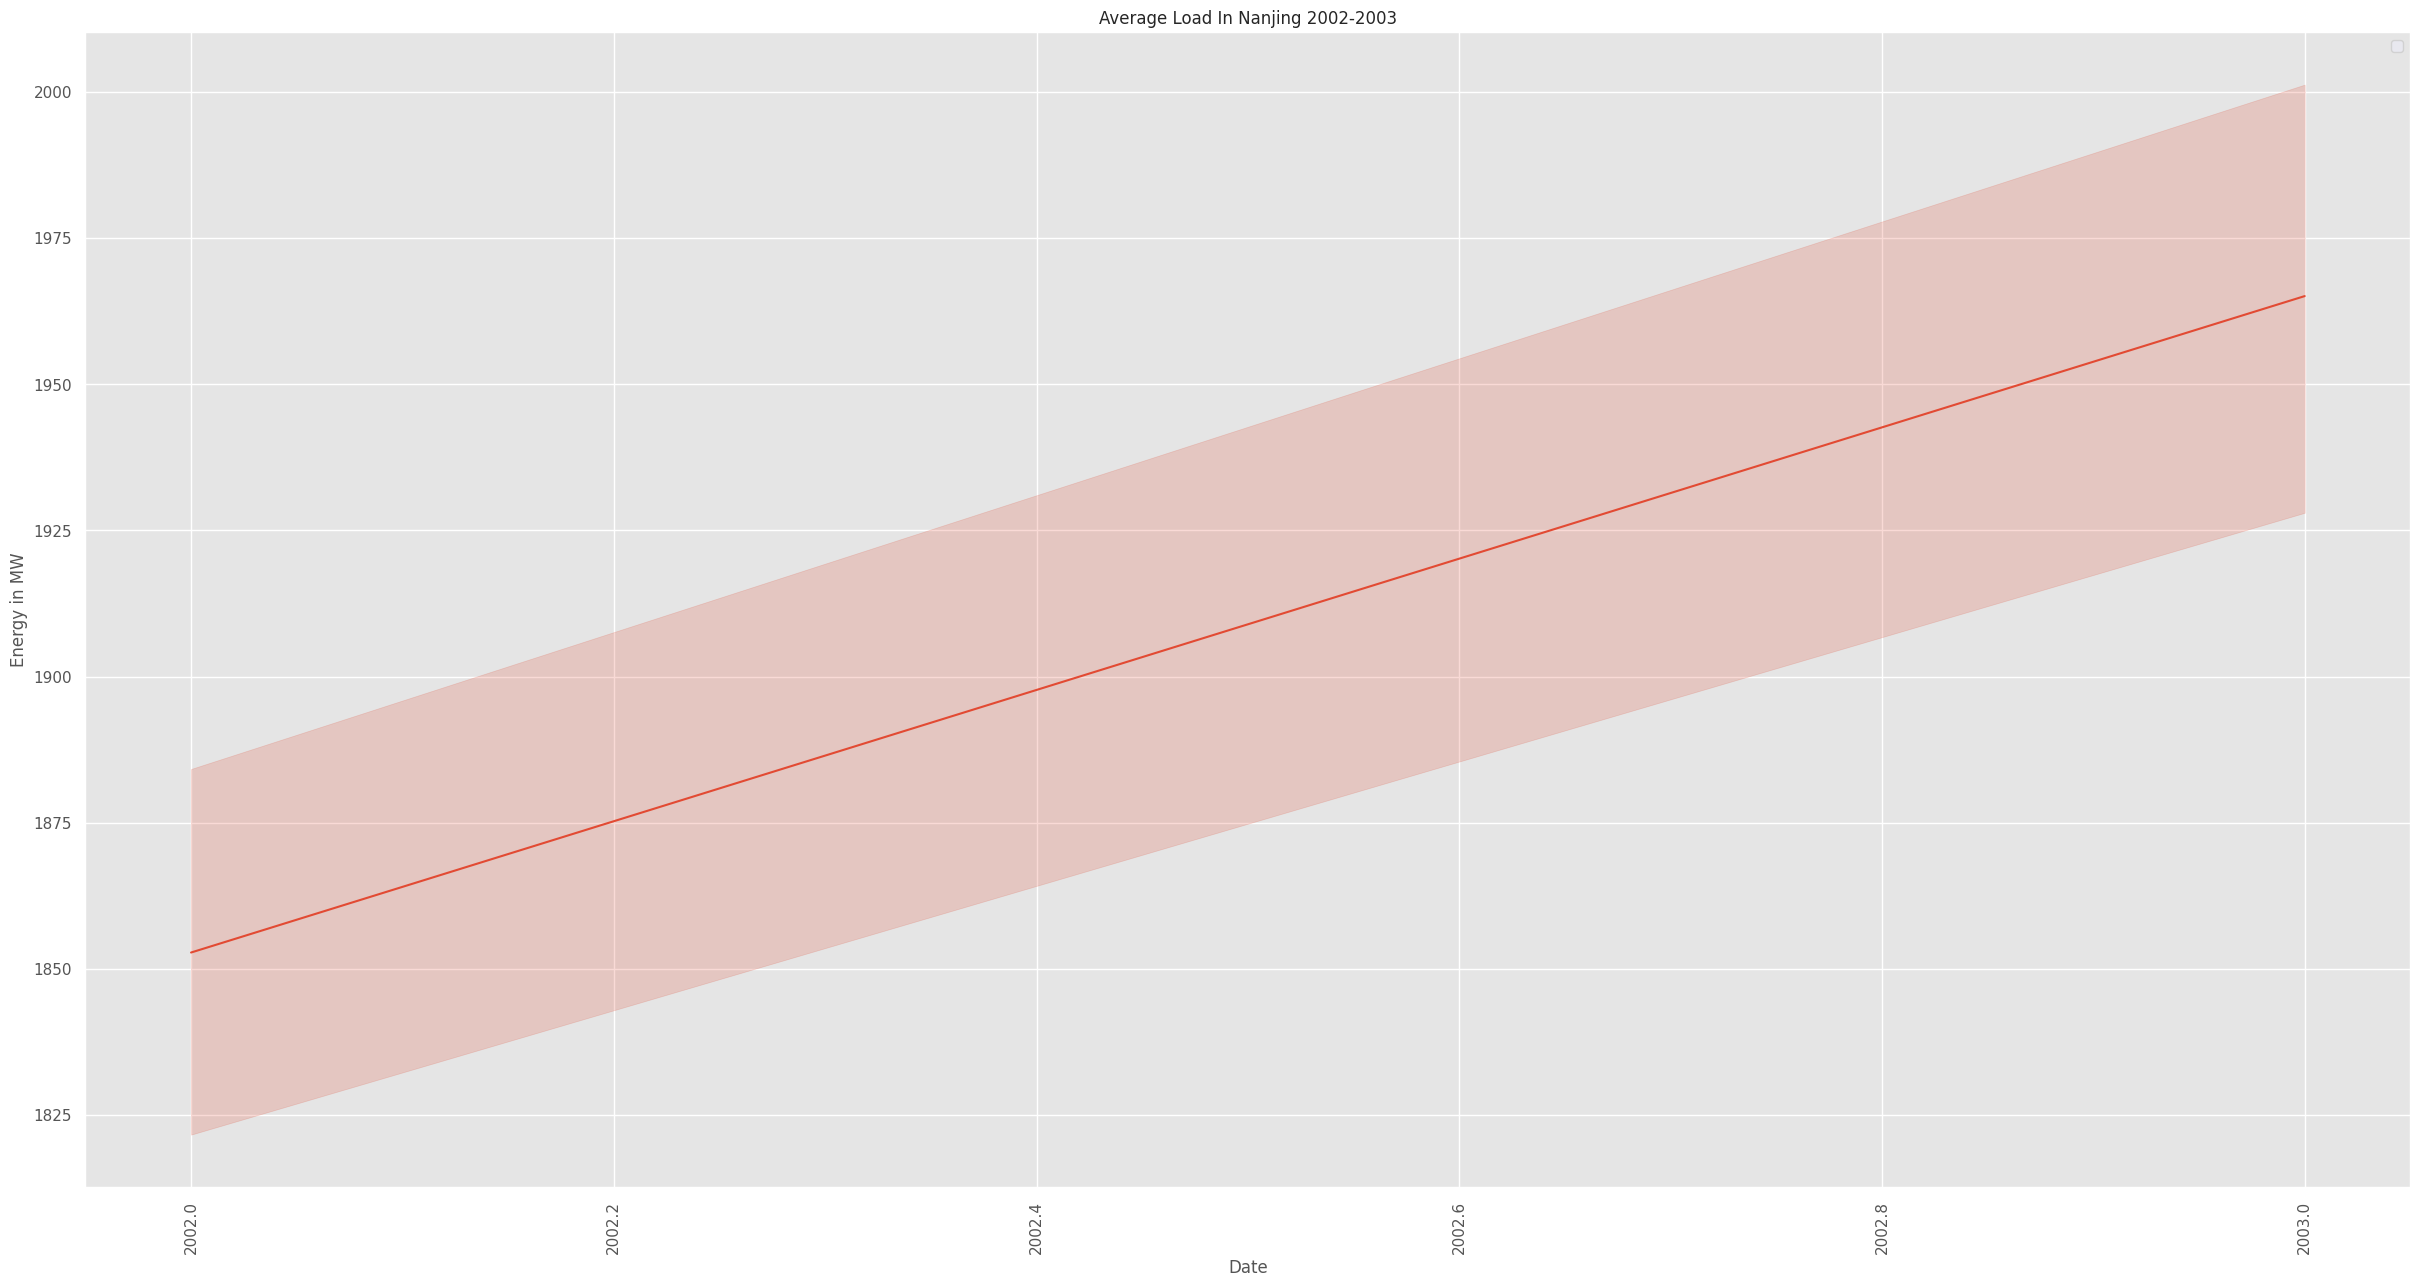

In [ ]:
from matplotlib import style # 从 matplotlib 模块导入 style 子模块，用于设置绘图样式
fig = plt.figure() # 创建一个新的图形对象
axes1 = plt.subplot2grid((1,1), (0,0)) # 在图形中创建一个子图，占据整个图形区域

style.use("ggplot") # 使用 "ggplot" 样式进行绘图
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset) # 使用 seaborn 的 lineplot 函数绘制折线图，x 轴为年份，y 轴为能源消耗量
sns.set(rc={'figure.figsize': (20,10)}) # 设置图形大小为 20x10

plt.title("Average Load In Nanjing 2002-2003") # 设置图形标题
plt.xlabel("Date") # 设置 x 轴标签
plt.ylabel("Energy in MW") # 设置 y 轴标签
plt.grid(True) # 显示网格线
plt.legend() # 显示图例

for label in axes1.xaxis.get_ticklabels(): # 遍历 x 轴刻度标签
    label.set_rotation(90) # 将 x 轴刻度标签旋转 90 度

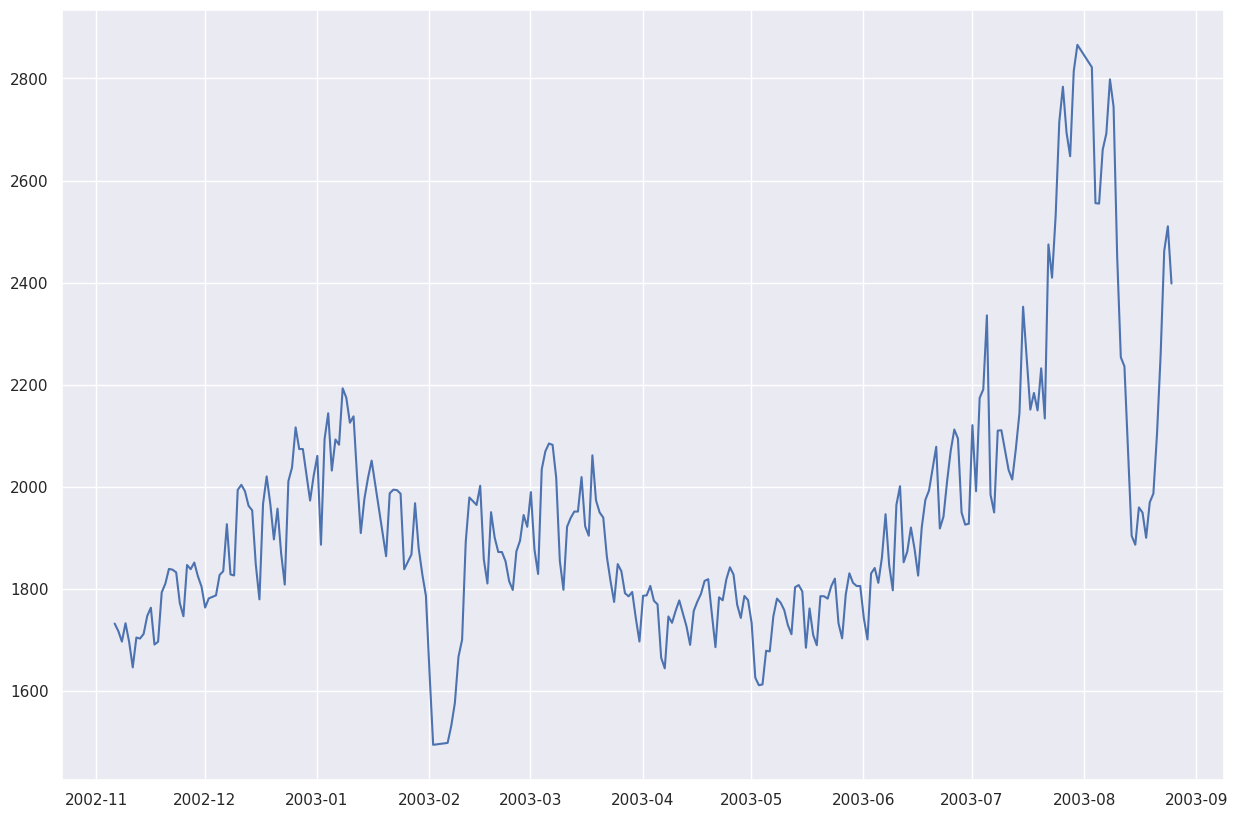

In [ ]:
plt.figure(figsize=(15,10)) # 创建一个大小为 15x10 的图形
plt.plot(dataset["Consumption"]) # 绘制 dataset["Consumption"] 的折线图

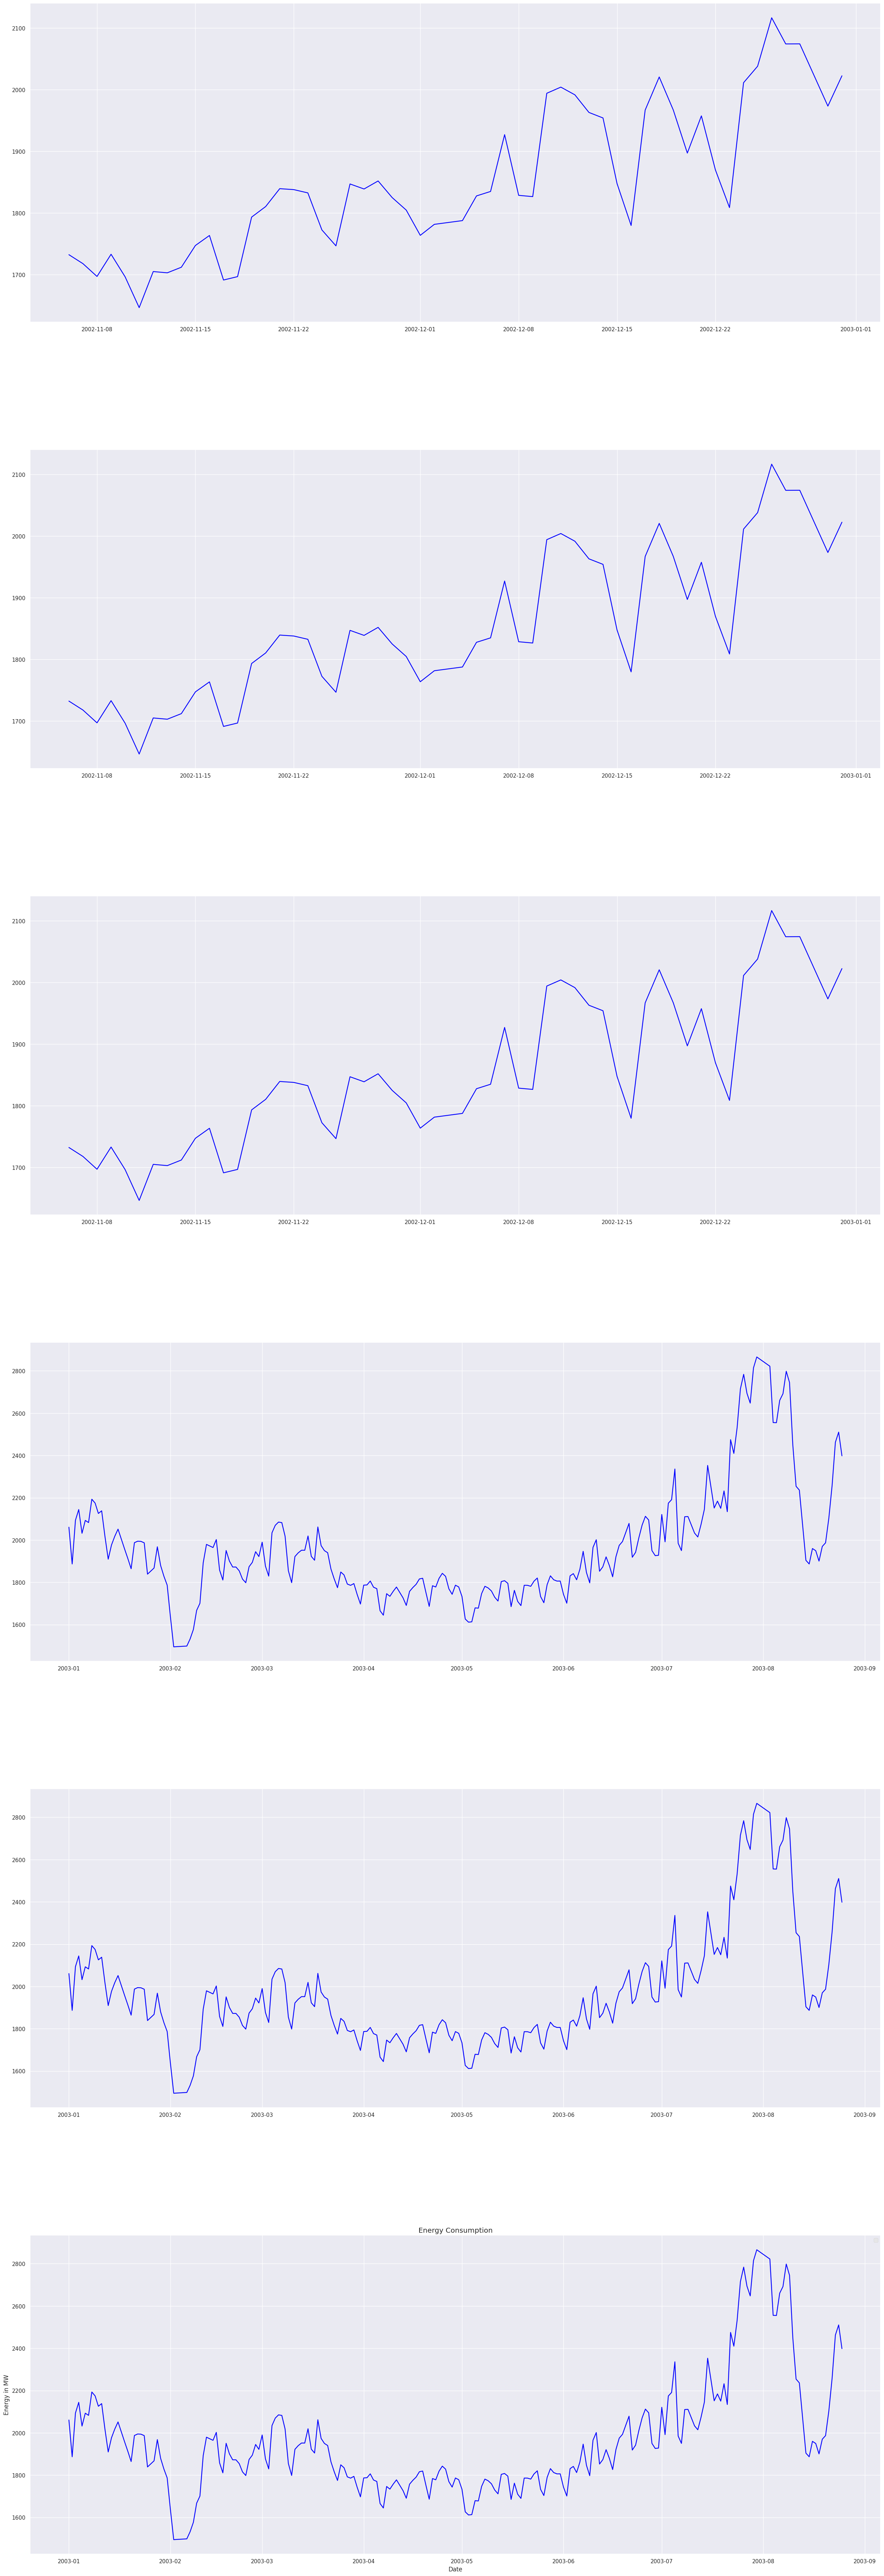

In [ ]:
# Energy Consumption Each Year # 每年能源消耗量
from matplotlib import style # 从 matplotlib 模块导入 style 子模块，用于设置绘图样式

fig = plt.figure(figsize = (30,30)) # 创建一个大小为 30x30 的图形对象

ax1 = fig.add_subplot(611) #
ax2 = fig.add_subplot(612) #
ax3 = fig.add_subplot(613) #
ax4 = fig.add_subplot(614) #
ax5 = fig.add_subplot(615) #
ax6 = fig.add_subplot(616) #

style.use("ggplot")

y_2016 = dataset.loc["2002"]["Consumption"].to_list()
x_2016 = dataset.loc["2002"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2002"]["Consumption"].to_list()
x_2017 = dataset.loc["2002"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2002"]["Consumption"].to_list()
x_2018 = dataset.loc["2002"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2003"]["Consumption"].to_list()
x_2019 = dataset.loc["2003"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2003"]["Consumption"].to_list()
x_2020 = dataset.loc["2003"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2003"]["Consumption"].to_list()
x_2021 = dataset.loc["2003"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)


plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4) #
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend() # 显示图例

Text(0.5, 1.0, 'Energy Distribution')

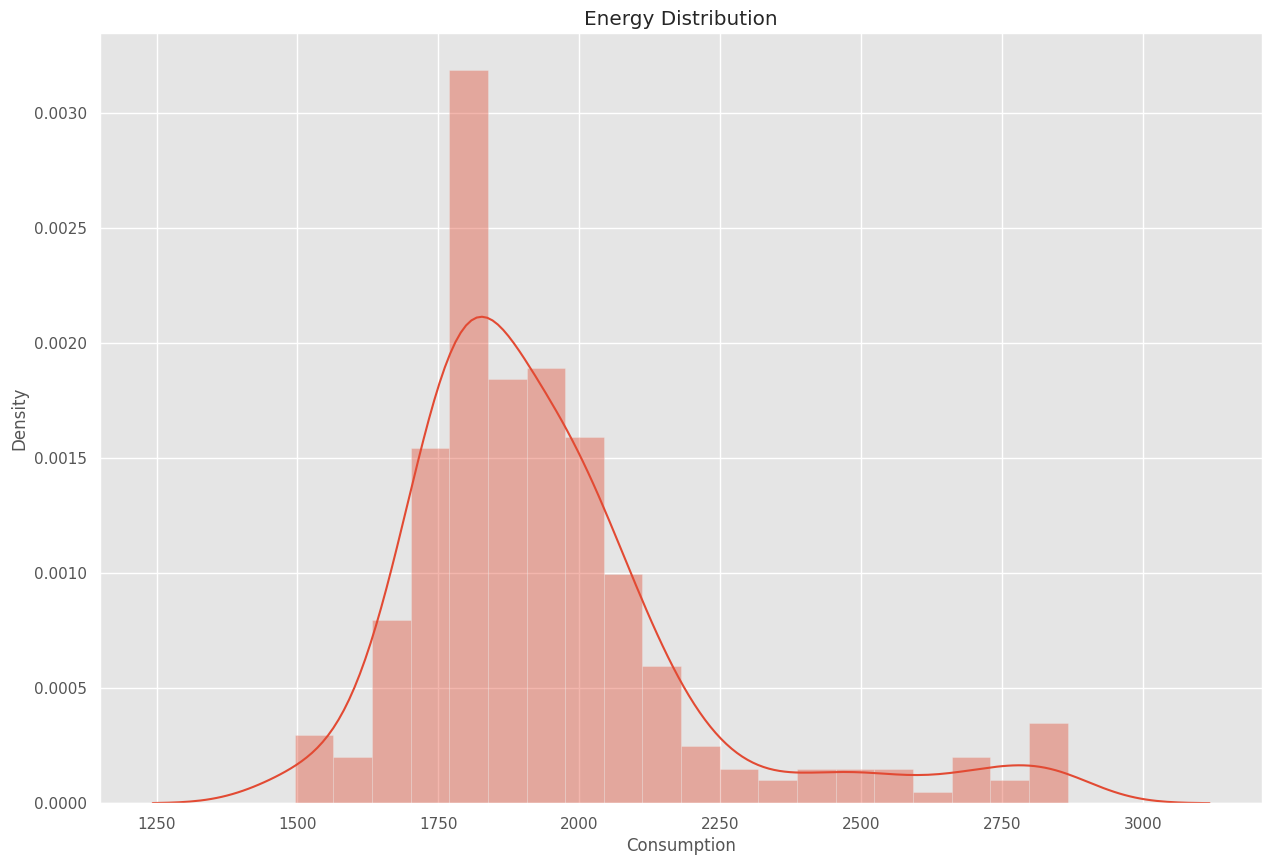

In [ ]:
# Distribution off Energy Consumption # 能源消耗的分布
fig = plt.figure(figsize = (15,10)) # 创建一个大小为 15x10 的图形对象
sns.distplot(dataset["Consumption"]) # 使用 seaborn 的 distplot 函数绘制能源消耗的分布图
plt.title("Energy Distribution") # 设置图形标题为 "Energy Distribution"

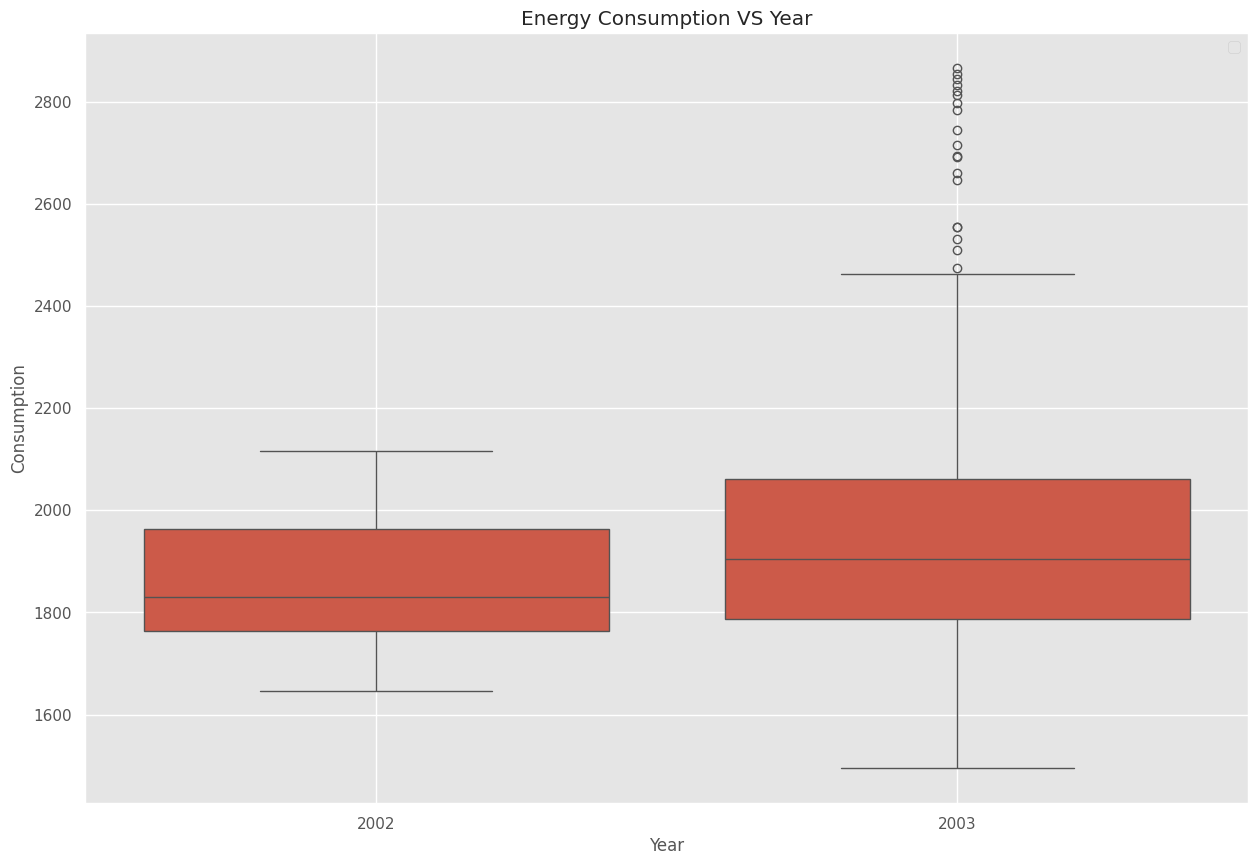

In [ ]:
fig = plt.figure(figsize = (15,10)) # 创建一个大小为 15x10 的图形对象
# Use 'dataset' instead of 'df' for consistency # 使用 'dataset' 而不是 'df' 以保持一致性
sns.boxplot(x=dataset.index.year, y=dataset.Consumption, data=dataset) # 使用 seaborn 的 boxplot 函数绘制箱线图，x 轴为年份，y 轴为能源消耗量
plt.title("Energy Consumption VS Year") # 设置图形标题为 "Energy Consumption VS Year"
plt.xlabel("Year") # 设置 x 轴标签为 "Year"
plt.grid(True, alpha=1) # 显示网格线
plt.legend() # 显示图例

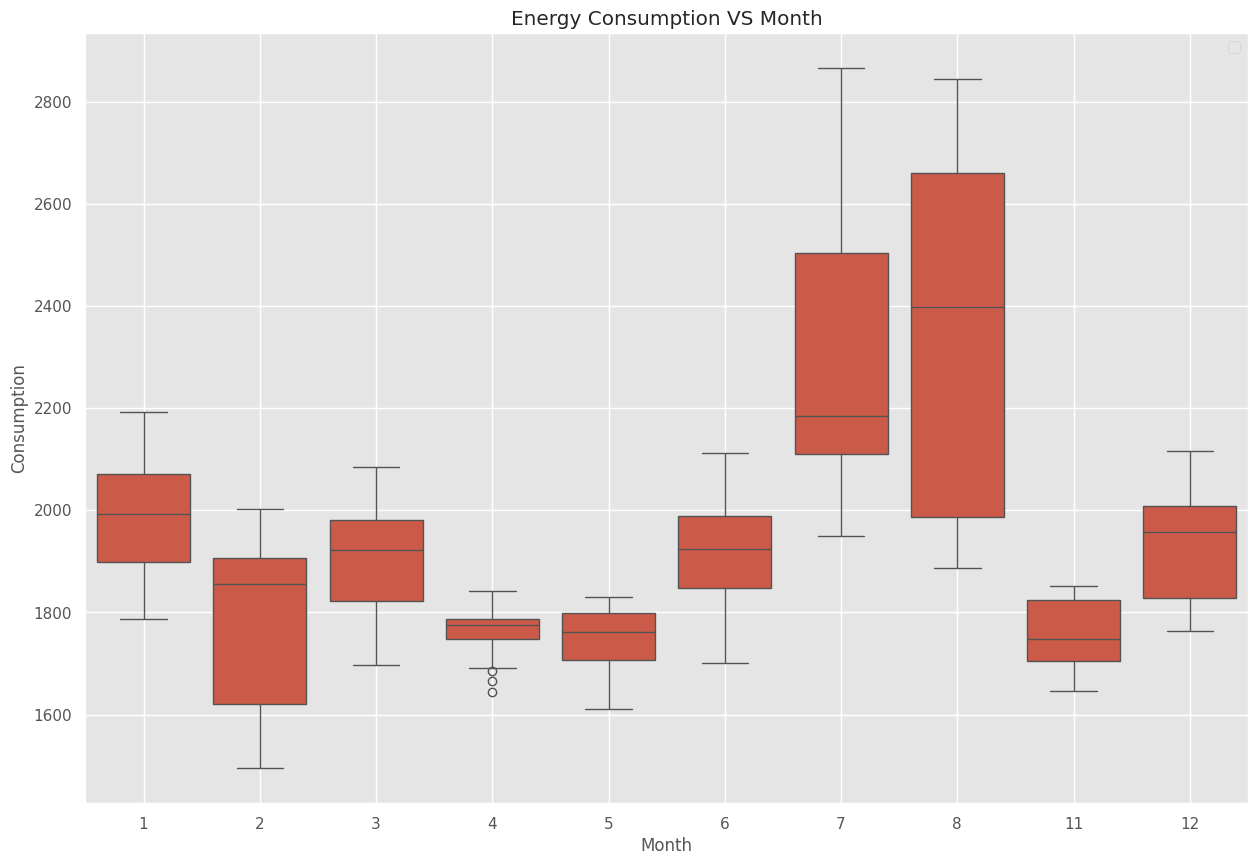

In [ ]:
fig = plt.figure(figsize = (15,10)) # 创建一个大小为 15x10 的图形对象
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data= df) # 使用 seaborn 的 boxplot 函数绘制箱线图，x 轴为月份，y 轴为能源消耗量
plt.title("Energy Consumption VS Month") # 设置图形标题为 "Energy Consumption VS Month"
plt.xlabel("Month") # 设置 x 轴标签为 "Month"
plt.grid(True, alpha=1) # 显示网格线
plt.legend() # 显示图例

for label in ax1.xaxis.get_ticklabels(): # 遍历 ax1 的 x 轴刻度标签
    label.set_rotation(90) # 将 x 轴刻度标签旋转 90 度

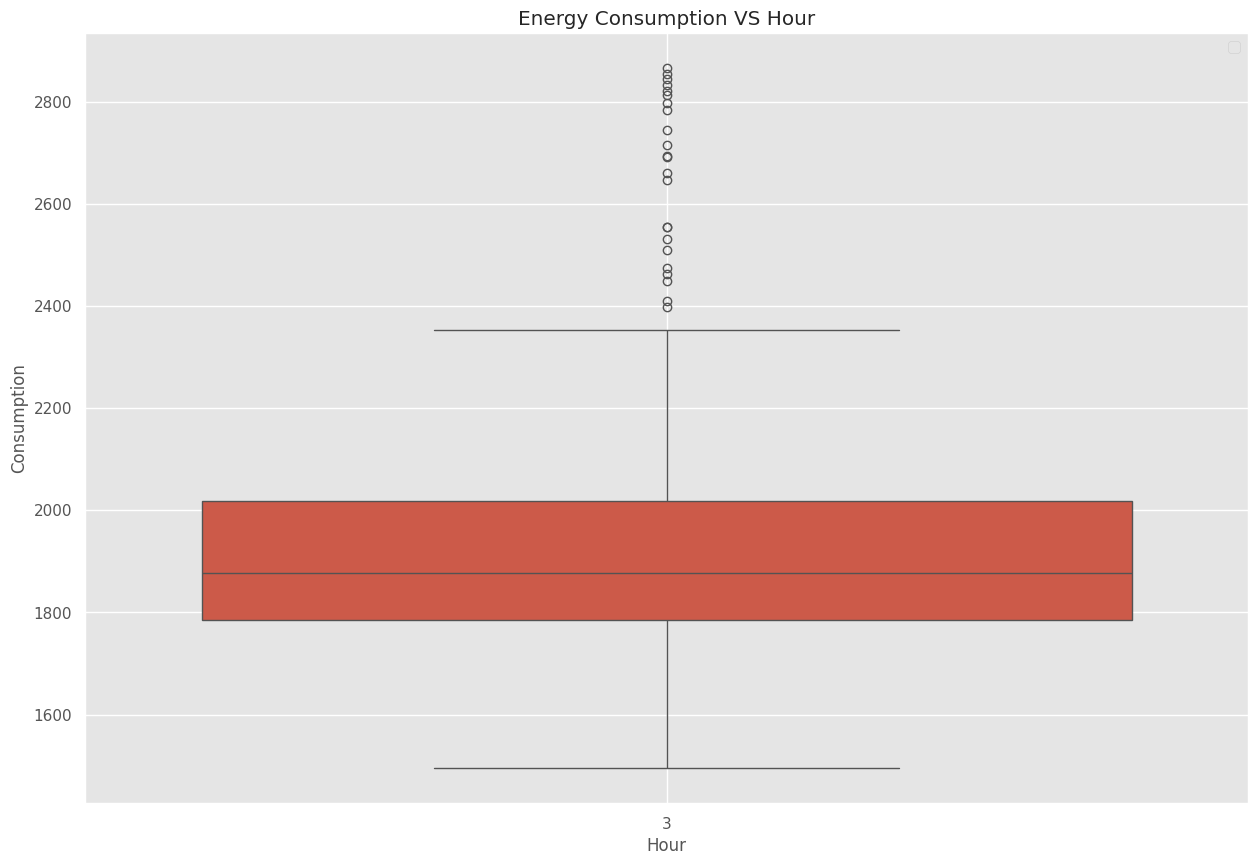

In [ ]:
fig = plt.figure(figsize = (15,10)) # 创建一个大小为 15x10 的图形对象
sns.boxplot(x=dataset.index.hour, y=dataset.Consumption, data=dataset) # 使用 seaborn 的 boxplot 函数绘制箱线图，x 轴为小时，y 轴为能源消耗量
plt.title("Energy Consumption VS Hour") # 设置图形标题为 "Energy Consumption VS Hour"
plt.xlabel("Hour") # 设置 x 轴标签为 "Hour"
plt.grid(True, alpha=1) # 显示网格线
plt.legend() # 显示图例

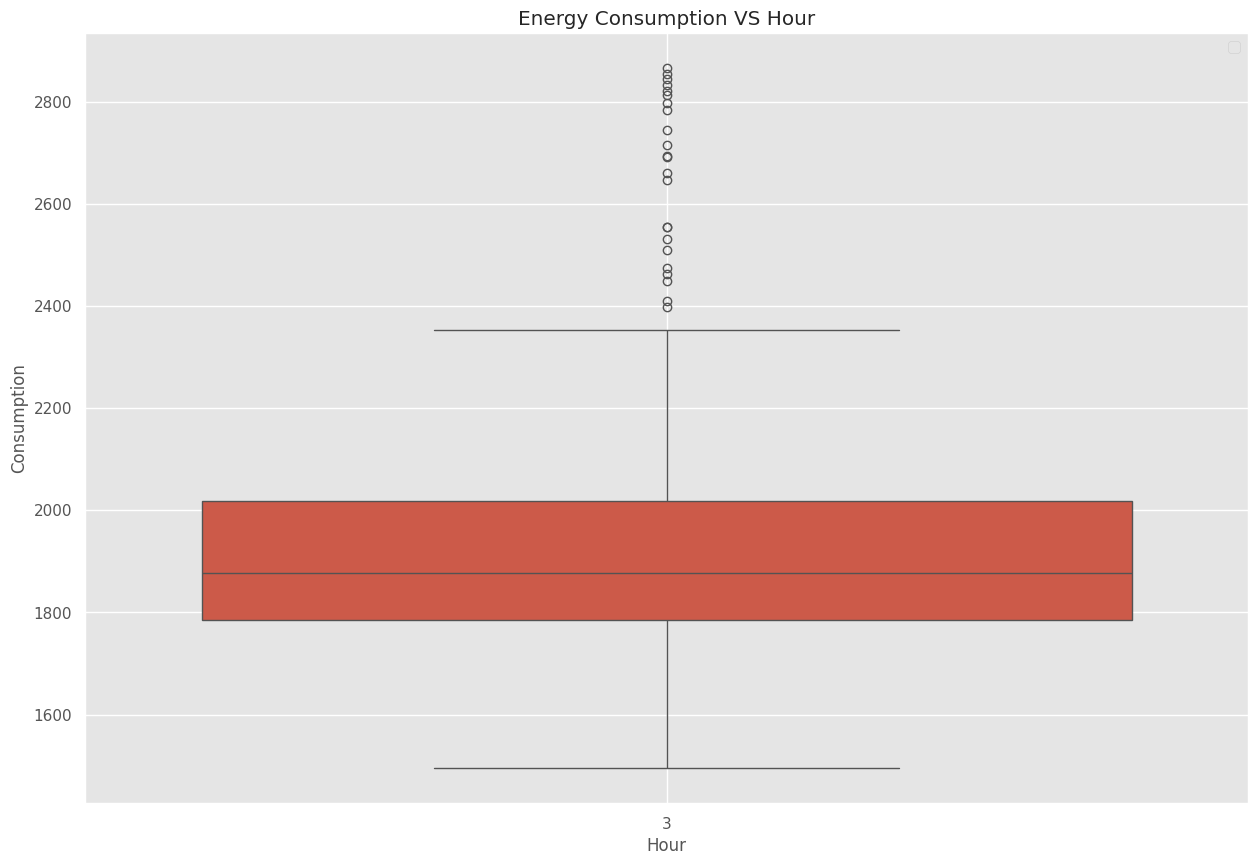

In [ ]:
fig = plt.figure(figsize = (15,10)) # 创建一个大小为 15x10 的图形对象
# 数据和 x、y 值都使用 dataset 保持一致
sns.boxplot(x=dataset.index.hour, y=dataset.Consumption, data=dataset) # 使用 seaborn 的 boxplot 函数绘制箱线图，x 轴为小时，y 轴为能源消耗量
plt.title("Energy Consumption VS Hour") # 设置图形标题为 "Energy Consumption VS Hour"
plt.xlabel("Hour") # 设置 x 轴标签为 "Hour"
plt.grid(True, alpha=1) # 显示网格线
plt.legend() # 显示图例

# **LSTM 模型**

## 训练集、验证集和测试集

In [ ]:
# 首先，确保索引是日期时间类型
dataset.index = pd.to_datetime(dataset.index) # 将数据集的索引转换为日期时间类型

# 删除任何非数字列（例如日期字段）
numeric_dataset = dataset.select_dtypes(include=["number"]) # 选择数据集中数据类型为数字的列

# 从每小时降采样到每天
newDataSet = numeric_dataset.resample("D").mean() # 对数据进行重新采样，以 "D"（天）为频率，并计算平均值

In [ ]:
# 我们有 2193 行
# 2193 - 3 - 6 = 2184 行，省略前两行和最后六行（NaN 值 -> 重新采样后）
# 2184 / 7 = 312 周
# 训练 - 测试分割 = 80:20
# 312 * 80 %  250 周用于训练（250 x 7 = 1750 天）
# 312 - 250 = 62 周用于测试（62 x 7 = 434 天）
print("Old Dataset: ", dataset.shape) # 打印旧数据集的形状
print("New Dataset: ", newDataSet.shape) # 打印新数据集的形状

# Add this code block to fill any remaining NaNs with the previous row's value
# 添加这段代码块，用上一行的值填充任何剩余的 NaN
print("\nFilling any remaining NaNs in newDataSet with the previous row's value (forward fill):")
newDataSet.fillna(method='ffill', inplace=True) # 使用 ffill 方法填充 NaN

# Check for NaNs again after forward fill
# 前向填充后再检查 NaN
print("Checking for NaNs in newDataSet after forward fill:")
print(newDataSet.isnull().sum())

# Note: Forward fill will not fill leading NaNs (NaNs at the very beginning of a column).
# If there are leading NaNs after this step, you might need another strategy,
# like backward fill (bfill) or dropping those initial rows.
# 注意：前向填充不会填充开头的 NaN（列最开头的 NaN）。
# 如果此步骤后仍有开头的 NaN，您可能需要另一种策略，
# 例如后向填充 (bfill) 或删除这些初始行。

Old Dataset:  (293, 7)
New Dataset:  (293, 4)

Filling any remaining NaNs in newDataSet with the previous row's value (forward fill):
Checking for NaNs in newDataSet after forward fill:
Consumption    0
Month          0
Year           0
Week           0
dtype: int64


In [ ]:
# Saving data in CSV new file # 将数据保存到新的 CSV 文件中
newDataSet.to_csv("newDataSet.csv") # 将 newDataSet 保存到名为 "newDataSet.csv" 的文件中
from google.colab import files # 从 google.colab 模块导入 files 子模块
files.download("newDataSet.csv") # 下载名为 "newDataSet.csv" 的文件

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
newDataSet.head() # 显示 newDataSet 的前 5 行

,Consumption,Month,Year,Week
DateTime,,,,
2002-11-06,1732.314,11.0,2002.0,45.0
2002-11-07,1717.768,11.0,2002.0,45.0
2002-11-08,1697.009,11.0,2002.0,45.0
2002-11-09,1733.018,11.0,2002.0,45.0
2002-11-10,1696.422,11.0,2002.0,45.0


In [ ]:
y = newDataSet["Consumption"] # 将 newDataSet 的 "Consumption" 列赋值给 y
print(y[0]) # 打印 y 的第一个元素
y.shape # 显示 y 的形状（维度）

1732.314


(293,)

In [ ]:
# 在模型拟合之前对数据进行归一化
# 它将提高性能（在神经网络中）+ 转换
from sklearn.preprocessing import MinMaxScaler # 从 sklearn.preprocessing 模块导入 MinMaxScaler 类，用于数据归一化

# 将输出和输入的范围缩放到 0-1，以匹配 LSTM 层的范围
scaler = MinMaxScaler(feature_range = (0,1)) # 创建 MinMaxScaler 对象，将特征范围设置为 (0, 1)

# 重塑：将单变量 1D 数组转换为 2D
# 单变量 1D = (2184,)
# 单变量 2D = (2184,1)

y = scaler.fit_transform(np.array(y).reshape(-1,1)) # 对 y 进行拟合和转换，将其转换为 2D 数组
print("Normalizing data before model fitting") # 打印 "Normalizing data before model fitting"
print(y[:10]) # 打印 y 的前 10 个元素

Normalizing data before model fitting
[[0.17320868]
 [0.16259859]
 [0.14745663]
 [0.17372219]
 [0.14702847]
 [0.11057661]
 [0.15325039]
 [0.1517653 ]
 [0.1583563 ]
 [0.18408574]]


In [ ]:
training_size = int(len(y)*0.80) # 计算训练集大小，占总数据量的 80%
test_size = len(y)- training_size # 计算测试集大小，为总数据量减去训练集大小
val_size = int(training_size*0.20) # 计算验证集大小，占训练集大小的 20%
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1] # 将数据划分为训练集、测试集和验证集

In [ ]:
# Building input variable # 构建输入变量
def create_dataset(dataset, time_step = 1): # 定义一个名为 create_dataset 的函数，用于创建数据集，time_step 参数默认为 1
  dataX, dataY = [] , [] # 初始化两个空列表 dataX 和 dataY，分别用于存储输入数据和目标数据
  for i in range(len(dataset)-time_step-1): # 遍历数据集，范围是从 0 到数据集长度减去 time_step 再减去 1
    a = dataset[i:(i+time_step),0] # Day 1 to 3 -> Predict Day 4 (eg. time_step = 3) # 从数据集的第 i 行到第 i+time_step 行提取数据，并将其存储到变量 a 中，例如，如果 time_step 为 3，则表示使用前 3 天的数据来预测第 4 天的数据
    dataX.append(a) # 将变量 a 添加到 dataX 列表中
    dataY.append(dataset[i + time_step,0]) # 将数据集的第 i+time_step 行的数据添加到 dataY 列表中，作为目标数据
  return np.array(dataX), np.array(dataY) # 将 dataX 和 dataY 转换为 NumPy 数组，并返回

In [ ]:
# create_dataset() = (samples, time_step) # create_dataset() 的输出 = (样本数, 时间步长)
time_step = 30 # 设置时间步长为 100
X_train, y_train = create_dataset(train_data, time_step) # 使用训练数据创建训练集的输入和输出
X_test, ytest = create_dataset(test_data, time_step) # 使用测试数据创建测试集的输入和输出
X_val, yval = create_dataset(val_data, time_step) # 使用验证数据创建验证集的输入和输出

In [ ]:
# Reshape train and input-output pairs (samples, time_steps, features) # 重塑训练和输入-输出对 (样本数，时间步长，特征数)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1) # 将 X_train 重塑为 (样本数，时间步长，特征数) 的形式
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1) # 将 X_test 重塑为 (样本数，时间步长，特征数) 的形式
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1) # 将 X_val 重塑为 (样本数，时间步长，特征数) 的形式

print("X_train shape: ", X_train.shape) # 打印 X_train 的形状
print("X_test shape: ",X_test.shape) # 打印 X_test 的形状
print("X_val shape: ",X_val.shape) # 打印 X_val 的形状

X_train shape:  (157, 30, 1)
X_test shape:  (28, 30, 1)
X_val shape:  (15, 30, 1)


## 模型结构

In [ ]:
from keras.models import Sequential # 从 keras.models 导入 Sequential 模型
from keras.layers import Dense # 从 keras.layers 导入 Dense 层
from keras.layers import LSTM # 从 keras.layers 导入 LSTM 层
from keras.layers import Dropout # 从 keras.layers 导入 Dropout 层

model = Sequential() # 创建一个 Sequential 模型

# 添加第一个 LSTM 层和一些 Dropout 正则化
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
# 添加一个 LSTM 层，单元数为 50，返回序列，输入形状为 (time_step, 1)
model.add(Dropout(0.2)) # 添加一个 Dropout 层，丢弃率为 0.2
model.add(LSTM(units = 50, return_sequences = True)) # 添加一个 LSTM 层，单元数为 50，返回序列
model.add(LSTM(units = 50, return_sequences = True)) # 添加一个 LSTM 层，单元数为 50，返回序列
model.add(LSTM(units = 50)) # 添加一个 LSTM 层，单元数为 50
model.add(Dense(units = 1)) # 添加一个 Dense 层，单元数为 1
# 编译 RNN
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'mean_squared_error')
# 使用 Adam 优化器和均方误差损失函数编译模型

In [ ]:
model.summary() # 打印模型的结构和参数信息

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

## 模型训练

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 200 ,batch_size = 10)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - loss: 0.0506 - val_loss: 0.0079
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.0125 - val_loss: 0.0065
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.0103 - val_loss: 0.0047
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0107 - val_loss: 0.0065
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0083 - val_loss: 0.0110
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0101 - val_loss: 0.0057
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0042 - val_loss: 0.0070
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms

In [ ]:
from google.colab import drive # 从 google.colab 模块导入 drive 子模块
drive.mount('/content/drive') # 将你的 Google Drive 挂载到 Colab 的 '/content/drive' 目录下

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model # 从 tensorflow.keras.models 导入 load_model 函数，用于加载模型
import joblib # 导入 joblib 库，用于保存和加载 Python 对象

# Change to your project directory # 切换到你的项目目录
%cd /content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage # 切换到 Google Drive 中的 'Predictive_Modeling_for_Energy_Usage' 文件夹

# Save the trained LSTM model # 保存训练好的 LSTM 模型
model.save("LSTM-Model.h5") # 将模型保存到名为 "LSTM-Model.h5" 的文件中

# Save the fitted scaler # 保存拟合好的 scaler
joblib.dump(scaler, "scaler.pkl") # 将 scaler 保存到名为 "scaler.pkl" 的文件中

print("✅ Model and scaler saved successfully!") # 打印 "✅ Model and scaler saved successfully!"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage # 切换到 Google Drive 中的 Predictive_Modeling_for_Energy_Usage 文件夹'
/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage
✅ Model and scaler saved successfully!


## 模型评估

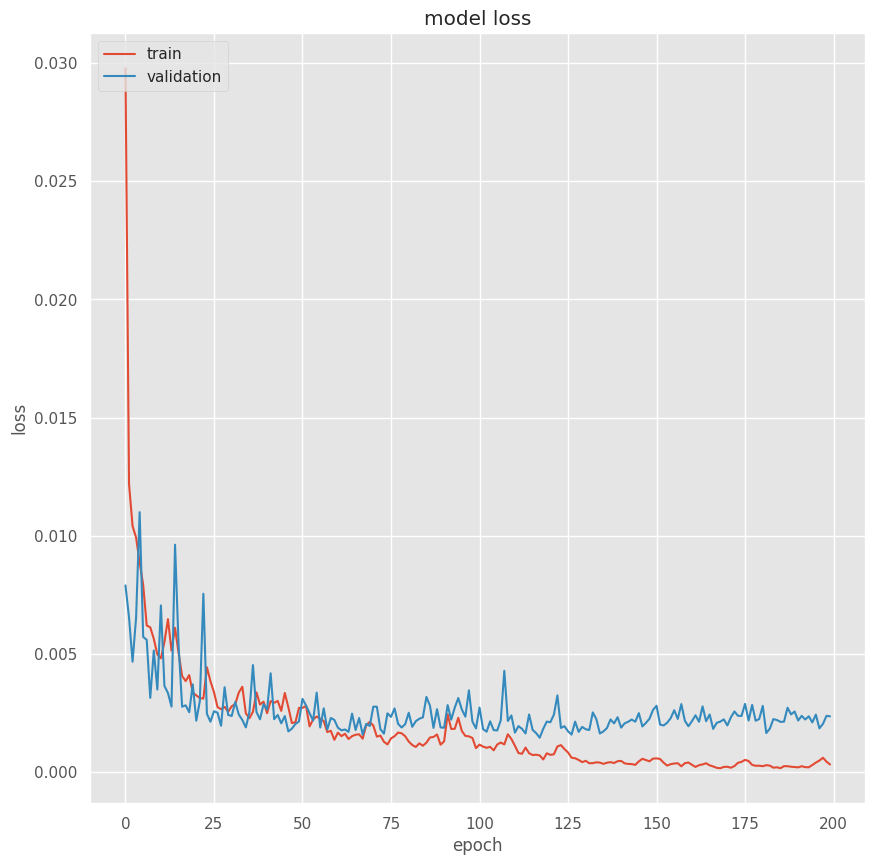

In [ ]:
plt.figure(figsize=(10,10)) # 创建一个大小为 10x10 的图形
plt.plot(history.history['loss']) # 绘制训练损失曲线 # tb
plt.plot(history.history['val_loss']) # 绘制验证损失曲线
plt.title('model loss') # 设置图形标题为 "model loss"
plt.ylabel('loss') # 设置 y 轴标签为 "loss"
plt.xlabel('epoch') # 设置 x 轴标签为 "epoch"
plt.legend(['train', 'validation'], loc='upper left') # 显示图例，标签为 "train" 和 "validation"，位置为左上角
plt.show() # 显示图形

In [ ]:
import tensorflow as tf # 导入 tensorflow 库，并将其命名为 tf
tf.__version__ # 获取 tensorflow 的版本号

'2.18.0'

In [ ]:
# Lets do the prediction and check performance metrics # 进行预测并检查性能指标
# (samples, features) # (样本，特征)
train_predict=model.predict(X_train) # 使用训练数据进行预测
test_predict=model.predict(X_test) # 使用测试数据进行预测
val_predict=model.predict(X_val) # 使用验证数据进行预测

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [ ]:
# Transform back to original form -> Inverse Transform # 转换回原始形式 -> 逆变换
train_predict=scaler.inverse_transform(train_predict) # 对训练集的预测结果进行逆变换，将其转换为原始数据的范围
test_predict=scaler.inverse_transform(test_predict) # 对测试集的预测结果进行逆变换，将其转换为原始数据的范围
val_predict=scaler.inverse_transform(val_predict) # 对验证集的预测结果进行逆变换，将其转换为原始数据的范围

In [ ]:
import math # 导入 math 模块
from sklearn.metrics import mean_squared_error # 从 sklearn.metrics 模块导入 mean_squared_error 函数
math.sqrt(mean_squared_error(y_train,train_predict)) # 计算训练集的均方根误差

1886.5669352345142

In [ ]:
print(train_predict.shape) # 打印训练集预测结果的形状
print(test_predict.shape) # 打印测试集预测结果的形状
print(val_predict.shape) # 打印验证集预测结果的形状
print(train_predict[0]) # 打印训练集预测结果的第一个元素
print(y_train.shape) # 打印训练集目标数据的形状

(157, 1)
(28, 1)
(15, 1)
[1864.4667]
(157,)


## 结论

In [ ]:
# Predicting consumption using training data # 预测训练数据的消耗量
train_predictions = model.predict(X_train)  # 使用模型预测训练数据
train_predictions =scaler.inverse_transform(train_predictions) # 将预测结果逆变换到原始范围

y_train = y_train.reshape(y_train.shape[0], 1) # 将 y_train 重塑为列向量
actual = scaler.inverse_transform(y_train) # 将实际值逆变换到原始范围
train_results = pd.DataFrame() # 创建一个空的 DataFrame 来存储结果

train_results["Train Predictions"] = train_predictions.tolist() # 将训练预测添加到 DataFrame
train_results["Actuals"] = actual.tolist() # 将实际值添加到 DataFrame

train_results # 显示结果 DataFrame

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


,Train Predictions,Actuals
0,[1864.4666748046875],[1834.83]
1,[1952.584228515625],[1926.958]
2,[1887.6837158203125],[1828.535]
3,[1847.0447998046875],[1826.469]
4,[2009.734375],[1994.044]
...,...,...
152,[1758.1885986328125],[1746.68]
153,[1797.6837158203125],[1781.185]
154,[1808.3336181640625],[1773.2779999999998]
155,[1786.51953125],[1758.893]


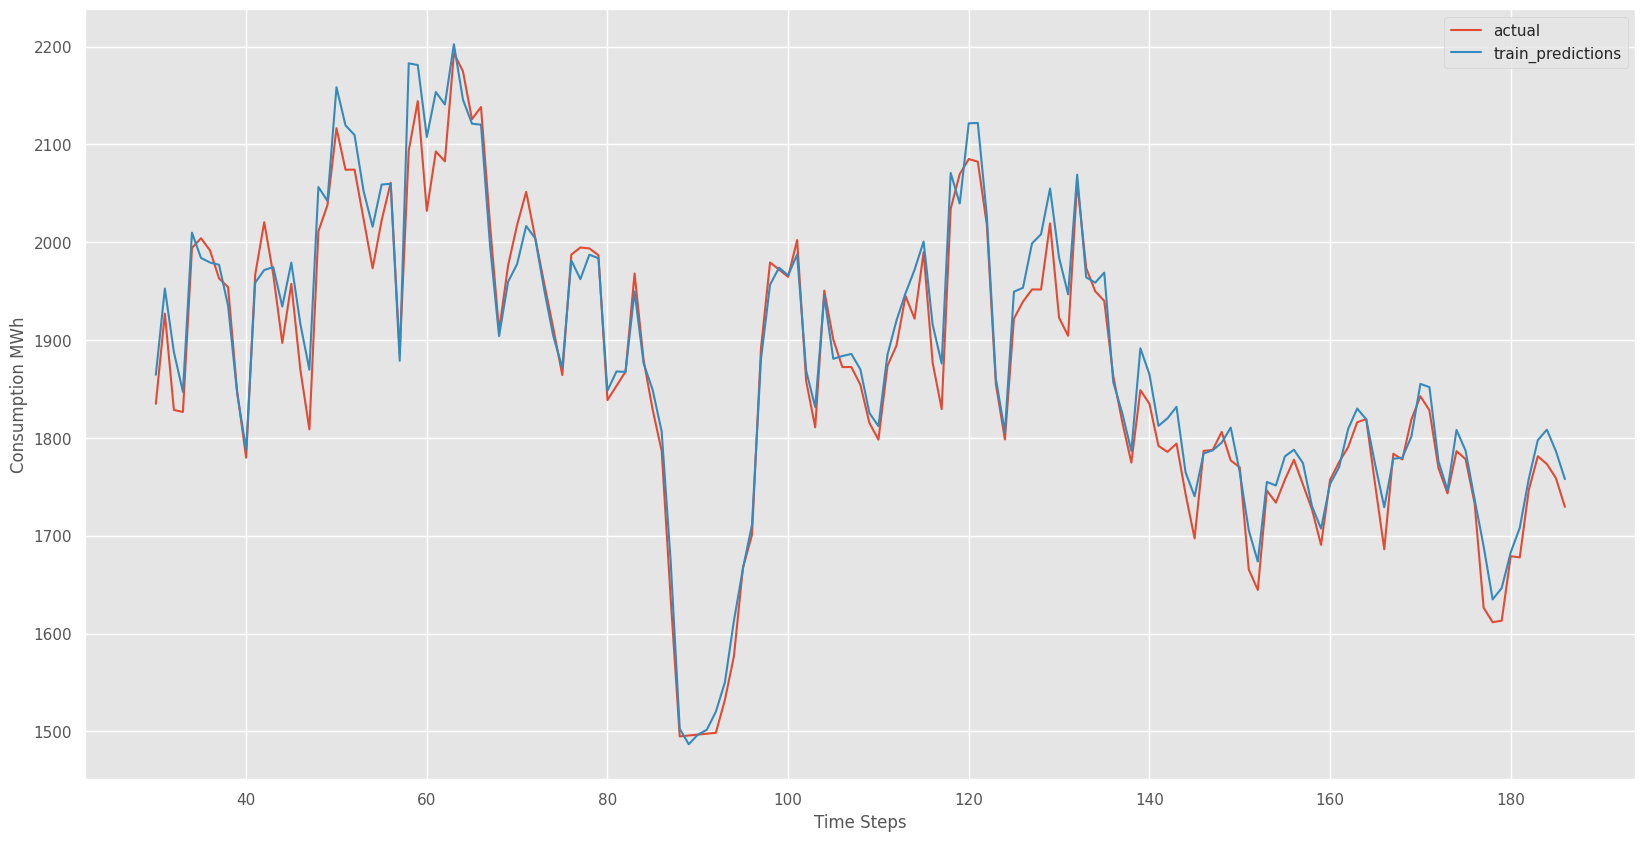

In [ ]:
plt.figure(figsize=(20,10)) # 创建一个大小为 20x10 的图形

# Actual Consumption # 实际消耗量
ActualPlot = np.empty_like(y ) # 创建一个与 y 形状相同的空数组
ActualPlot[:, :] = np.nan # 将 ActualPlot 的所有元素设置为 NaN

# 将 actual 的值赋给 ActualPlot 的一部分，从 time_step 索引开始
# actual 的长度是 157 (训练样本数)
# ActualPlot 的起始索引应该是 time_step (30)
# 结束索引是 time_step + len(actual) = 30 + 157 = 187
ActualPlot[time_step : time_step + len(actual), :] = actual # 将 actual 的值赋给 ActualPlot 的一部分，从 time_step 索引开始
plt.plot(ActualPlot) # 绘制 ActualPlot 的曲线

TrainPredictionsPlot = np.empty_like(y ) # 创建一个与 y 形状相同的空数组
TrainPredictionsPlot[:, :] = np.nan # 将 TrainPredictionsPlot 的所有元素设置为 NaN

# 将 train_predictions 的值赋给 TrainPredictionsPlot 的一部分，从 time_step 索引开始
# train_predictions 的长度也是 157
TrainPredictionsPlot[time_step : time_step + len(train_predictions), :] = train_predictions # 将 train_predictions 的值赋给 TrainPredictionsPlot 的一部分，从 time_step 索引开始
plt.plot(TrainPredictionsPlot) # 绘制 TrainPredictionsPlot 的曲线

plt.legend(['actual','train_predictions']) # 设置图例，标签为 'actual' 和 'train_predictions'
plt.xlabel('Time Steps') # 设置 x 轴标签为 'Time Steps'
plt.ylabel('Consumption MWh') # 设置 y 轴标签为 'Consumption MWh'
plt.show() # 显示图形

In [ ]:
# Predicting consumption using validation data # 预测验证数据的消耗量
val_predictions = model.predict(X_val) # 使用模型预测验证数据
val_predictions =scaler.inverse_transform(val_predictions) # 将预测结果逆变换到原始范围

yval = yval.reshape(yval.shape[0], 1) # 将 yval 重塑为列向量
actual_val = scaler.inverse_transform(yval) # 将实际值逆变换到原始范围

val_results = pd.DataFrame() # 创建一个空的 DataFrame 来存储结果
val_results["Val Predictions"] = val_predictions.tolist() # 将验证预测添加到 DataFrame
val_results["Actuals_val"] = actual_val.tolist() # 将实际值添加到 DataFrame

val_results # 显示结果 DataFrame

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


,Val Predictions,Actuals_val
0,[2022.76123046875],[1852.3380000000002]
1,[1907.394775390625],[1873.246]
2,[1925.6639404296875],[1920.378]
3,[1841.0228271484375],[1879.072]
4,[1824.5103759765625],[1826.224]
5,[1944.6751708984375],[1920.7069999999999]
6,[2000.0274658203125],[1974.64]
7,[2034.77783203125],[1992.773]
8,[2035.181640625],[2035.6929999999998]
9,[2035.824462890625],[2078.614]


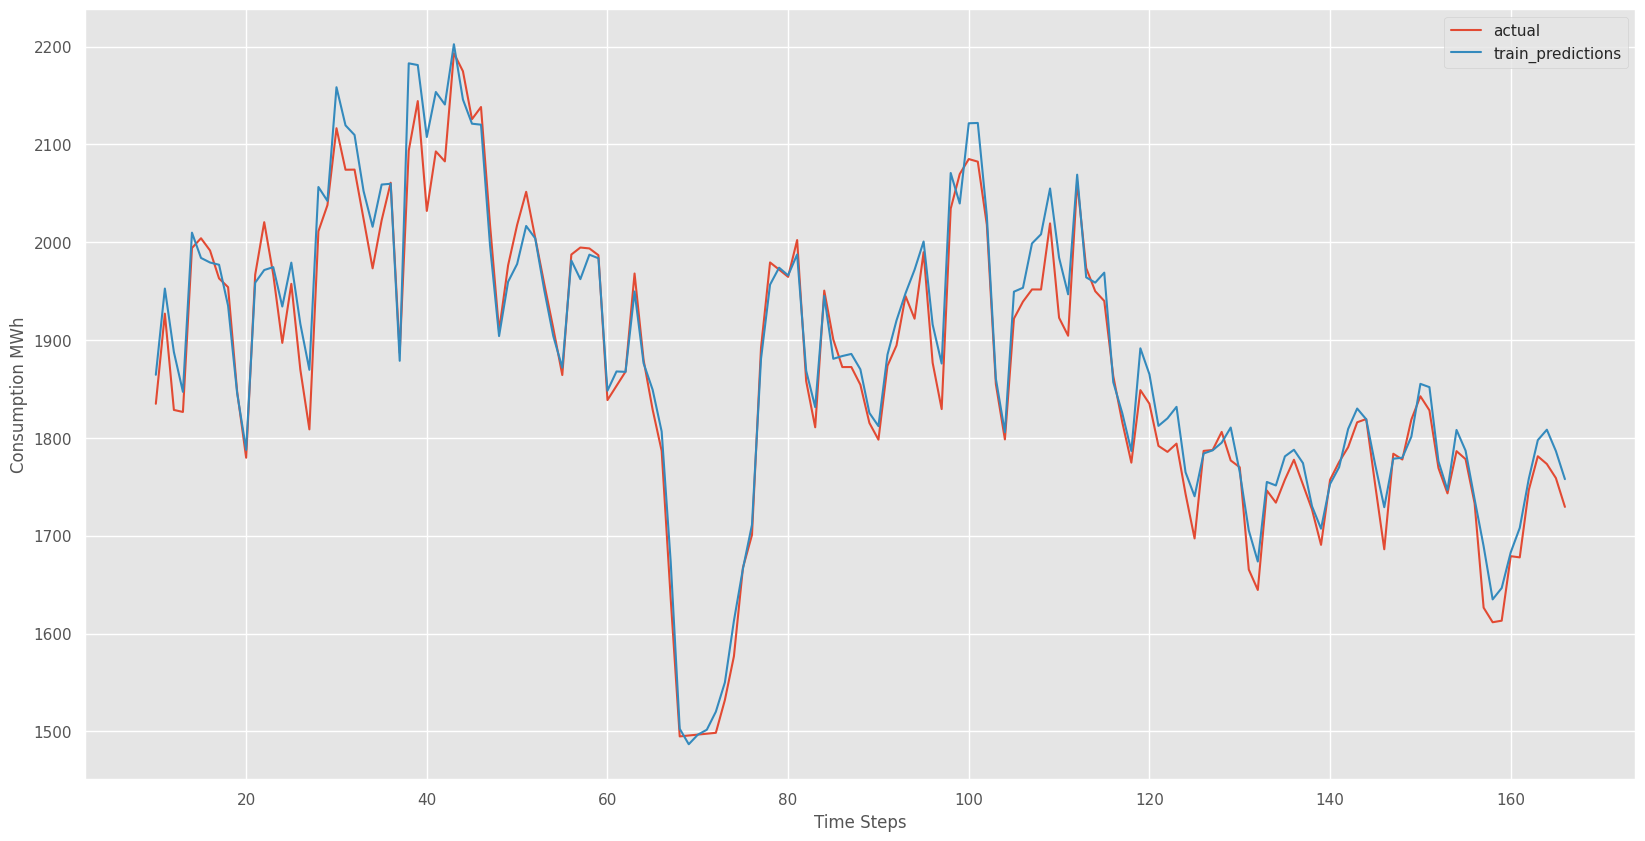

In [ ]:
plt.figure(figsize=(20,10)) # 创建一个大小为 20x10 的图形

# Actual Consumption # 实际消耗量
ActualPlot = np.empty_like(y ) # 创建一个与 y 形状相同的空数组
ActualPlot[:, :] = np.nan # 将 ActualPlot 的所有元素设置为 NaN
# 将 actual 的值赋给 ActualPlot 的一部分，从索引 10 开始
ActualPlot[10:len(train_predictions)+10, :] = actual.tolist() # 将 actual 的值赋给 ActualPlot 的一部分，从索引 887 改为 10 开始
plt.plot(ActualPlot) # 绘制 ActualPlot 的曲线

TrainPredictionsPlot = np.empty_like(y ) # 创建一个与 y 形状相同的空数组
TrainPredictionsPlot[:, :] = np.nan # 将 TrainPredictionsPlot 的所有元素设置为 NaN
# 将 train_predictions 的值赋给 TrainPredictionsPlot 的一部分，从索引 10 开始
TrainPredictionsPlot[10:len(train_predictions)+10, :] = train_predictions.tolist() # 将 train_predictions 的值赋给 TrainPredictionsPlot 的一部分，从索引 887 改为 10 开始
plt.plot(TrainPredictionsPlot) # 绘制 TrainPredictionsPlot 的曲线

plt.legend(['actual','train_predictions']) # 设置图例，标签为 'actual' 和 'train_predictions'
plt.xlabel('Time Steps') # 设置 x 轴标签为 'Time Steps'
plt.ylabel('Consumption MWh') # 设置 y 轴标签为 'Consumption MWh'
plt.show() # 显示图形

In [ ]:
# Predicting consumption using test data # 预测测试数据的消耗量
test_predictions = model.predict(X_test) # 使用模型预测测试数据
test_predictions =scaler.inverse_transform(test_predictions) # 将预测结果逆变换到原始范围

ytest = ytest.reshape(ytest.shape[0], 1) # 将 ytest 重塑为列向量
actual_test = scaler.inverse_transform(ytest) # 将实际值逆变换到原始范围

test_results = pd.DataFrame() # 创建一个空的 DataFrame 来存储结果
test_results["test Predictions"] = test_predictions.tolist() # 将测试预测添加到 DataFrame
test_results["Actuals_test"] = actual_test.tolist() # 将实际值添加到 DataFrame

test_results # 显示结果 DataFrame

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


,test Predictions,Actuals_test
0,[1913.436767578125],[2647.561]
1,[2052.379150390625],[2814.385]
2,[1989.9276123046875],[2865.811]
3,[1938.5892333984375],[2854.8530000000005]
4,[2097.321044921875],[2843.895]
5,[2137.474853515625],[2832.937]
6,[2132.54736328125],[2821.9789999999994]
7,[2131.6484375],[2555.599]
8,[2010.8468017578125],[2554.873]
9,[2219.94189453125],[2660.488]


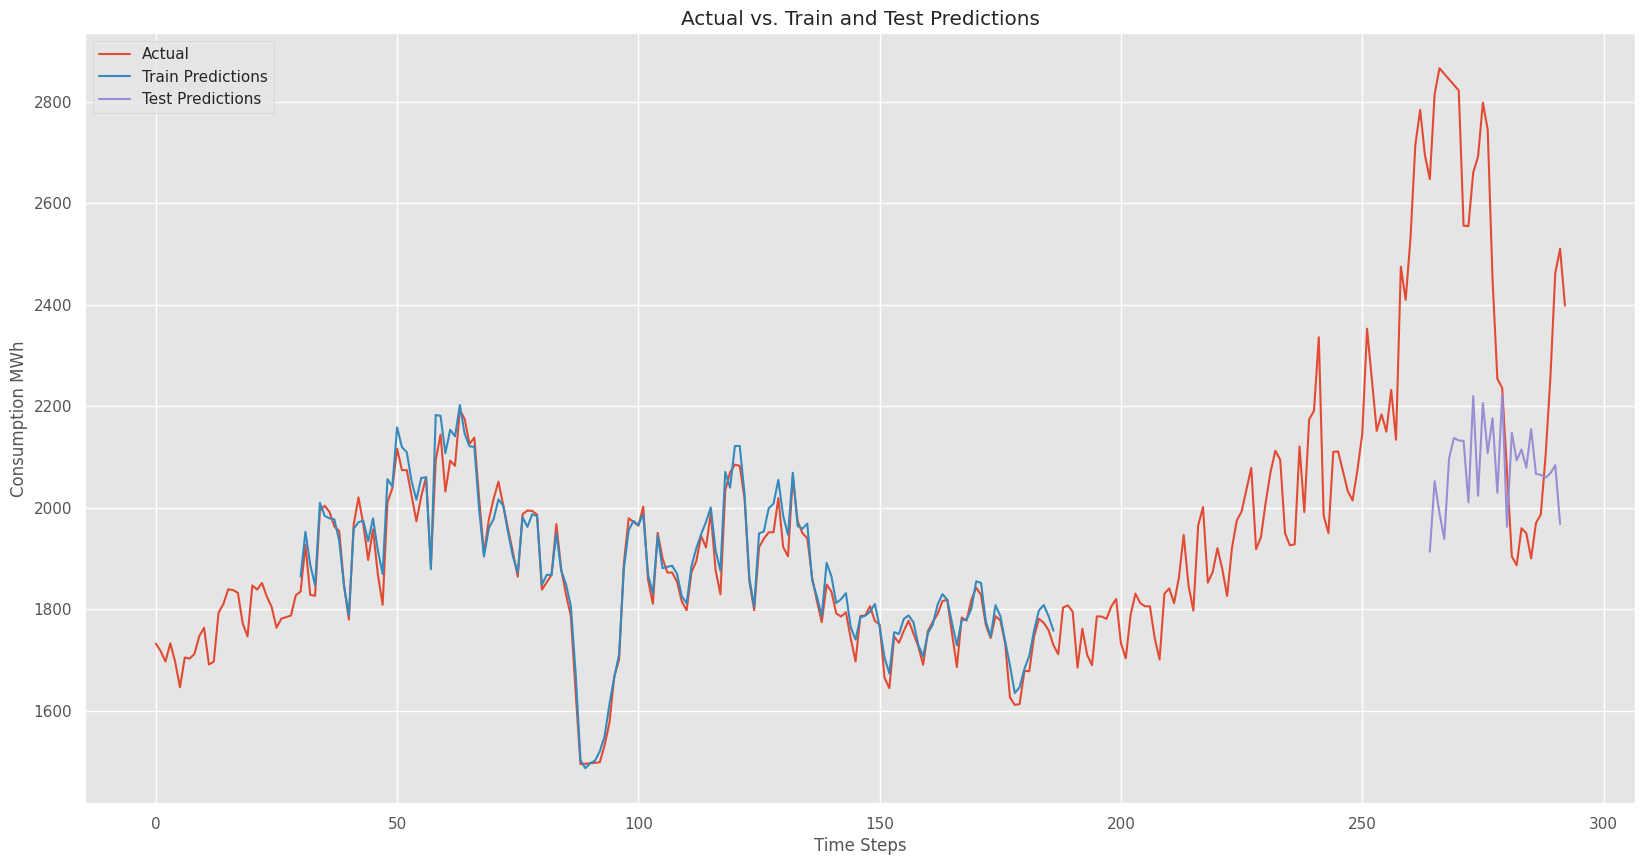

In [ ]:
### Plotting # 绘图
# shift train predictions for plotting # 移动训练预测以进行绘图
fig, ax = plt.subplots(figsize=(20,10)) # 创建一个大小为 (20, 10) 的图形和坐标轴
trainPredictPlot = np.empty_like(y) # 创建一个与 y 形状相同的空数组
trainPredictPlot[:, :] = np.nan # 将 trainPredictPlot 的所有元素设置为 NaN

# Calculate the starting index for training predictions
# Training predictions correspond to actual values starting from index time_step in the original data 'y'
# 计算训练预测的起始索引
# 训练预测对应于原始数据 'y' 中从索引 time_step 开始的实际值
train_predict_start_index = time_step
trainPredictPlot[train_predict_start_index : len(train_predict) + train_predict_start_index, :] = train_predict # 将 train_predict 的值赋给 trainPredictPlot 的一部分

# shift test predictions for plotting # 移动测试预测以进行绘图
testPredictPlot = np.empty_like(y) # 创建一个与 y 形状相同的空数组
testPredictPlot[:, :] = np.nan # 将 testPredictPlot 的所有元素设置为 NaN

# Calculate the starting index for test predictions
# Test predictions correspond to actual values starting from the start of the test data in 'y' + time_step
# 测试集在原始数据 'y' 中从索引 training_size (234) 开始
test_data_start_in_y = training_size
test_predict_start_index = test_data_start_in_y + time_step

# 确保切片范围与 test_predict 的长度匹配
# 切片的结束索引 = 起始索引 + test_predict 的长度
testPredictPlot[test_predict_start_index : test_predict_start_index + len(test_predict), :] = test_predict # 将 test_predict 的值赋给 testPredictPlot 的一部分

# plot baseline and predictions # 绘制基线和预测
plt.plot(scaler.inverse_transform(y), label='Actual') # 绘制逆变换后的 y 的曲线，添加标签
plt.plot(trainPredictPlot, label='Train Predictions') # 绘制 trainPredictPlot 的曲线，添加标签
plt.plot(testPredictPlot, label='Test Predictions') # 绘制 testPredictPlot 的曲线，添加标签
plt.legend() # 显示图例
plt.xlabel('Time Steps') # 设置 x 轴标签为 'Time Steps'
plt.ylabel('Consumption MWh') # 设置 y 轴标签为 'Consumption MWh'
plt.title('Actual vs. Train and Test Predictions') # 添加标题
plt.show() # 显示图形

# **未来预测**

In [ ]:
print(len(test_data)) # 打印测试数据的长度
print(test_data[0]) # 打印测试数据的第一个元素
print(len(train_data)) # 打印训练数据的长度
x_input=test_data[337:].reshape(1,-1) # 将测试数据从索引 337 开始的部分重塑为一个形状为 (1, -1) 的数组，并赋值给 x_input
print(x_input.shape) # 打印 x_input 的形状
# print(x_input[0]) # 打印 x_input 的第一个元素 (已注释掉)
temp_input=list(x_input) # 将 x_input 转换为列表，并赋值给 temp_input
temp_input=temp_input[0].tolist() # 将 temp_input 的第一个元素转换为列表，并重新赋值给 temp_input
# print(temp_input) # 打印 temp_input (已注释掉)

59
[0.33194355]
188
(1, 0)


In [ ]:
# print(len(test_data)) # 打印测试数据的长度
# print(test_data[0]) # 打印测试数据的第一个元素
# print(len(train_data)) # 打印训练数据的长度

# Use the last n_steps elements of the test data as the initial input
# 使用测试数据的最后 n_steps 个元素作为初始输入
n_steps = 60 # time_steps # 设置时间步长为 100 -> 修改为 10
# Ensure test_data has at least n_steps elements
if len(test_data) < n_steps:
    print(f"Error: test_data has only {len(test_data)} elements, but n_steps is {n_steps}. Cannot use the last {n_steps} elements for forecasting.")
    # You might need to handle this case differently, e.g., use a smaller n_steps or different data
else:
    x_input = test_data[-n_steps:].reshape(1, -1) # 将测试数据的最后 n_steps 个元素重塑为一个形状为 (1, -1) 的数组，并赋值给 x_input
    print("Initial x_input shape:", x_input.shape) # 打印初始 x_input 的形状

    temp_input = x_input[0].tolist() # 将 x_input 的第一个元素转换为列表，并赋值给 temp_input
    print("Initial temp_input length:", len(temp_input)) # 打印初始 temp_input 的长度

# Demonstrate prediction for next 30 days # 演示未来 30 天的预测
from numpy import array # 从 numpy 模块导入 array 函数

lst_output=[] # 初始化一个空列表，用于存储预测结果
# n_steps is already defined as 100 # n_steps 已经定义为 100
i=0 # 初始化计数器
# test = "" # 初始化一个空字符串，用于调试 (不再需要这个调试变量)

# Check if temp_input was initialized successfully before the loop
if 'temp_input' in locals() and len(temp_input) == n_steps:
    while(i<60): # Assume i<30 # 假设 i 小于 30，循环 30 次，表示预测未来 30 天

        # The logic here was slightly off, simplified to always use the last n_steps of temp_input
        # 这里的逻辑有点问题，简化为始终使用 temp_input 的最后 n_steps 个元素
        x_input=np.array(temp_input[-n_steps:]) # 将 temp_input 中最后 n_steps 个元素转换为 NumPy 数组，并赋值给 x_input
        # print("{} day input {}".format(i,x_input)) # 打印第 i 天的输入数据，用于调试 (已注释掉)

        x_input = x_input.reshape((1, n_steps, 1)) # 将 x_input 重塑为形状为 (1, n_steps, 1) 的数组，以便输入到 LSTM 模型中
        # print(f"Reshaped input shape for prediction: {x_input.shape}") # 打印重塑后的输入形状，用于调试

        yhat = model.predict(x_input, verbose=0) # 使用 LSTM 模型进行预测，verbose=0 表示不显示预测进度
        # print("{} day output {}".format(i,yhat)) # 打印第 i 天的预测结果，用于调试

        # Append the predicted value to temp_input for the next prediction step
        # 将预测值添加到 temp_input 中，用于下一次预测
        temp_input.extend(yhat[0].tolist())

        # Add the predicted value to the output list
        # 将预测值添加到输出列表中
        lst_output.extend(yhat.tolist())

        i=i+1 # 将计数器加 1

    # print(test) # 打印 test 变量的值，用于调试 (已注释掉)
    print("Length of predicted output list:", len(lst_output)) # 打印 lst_output 的长度，即预测结果的数量
else:
    print("Forecasting could not start due to insufficient test data.") # 如果 temp_input 未成功初始化，打印此消息

Error: test_data has only 59 elements, but n_steps is 60. Cannot use the last 60 elements for forecasting.
Forecasting could not start due to insufficient test data.


In [ ]:
# print(len(test_data)) # 打印测试数据的长度
# print(test_data[0]) # 打印测试数据的第一个元素
# print(len(train_data)) # 打印训练数据的长度

# Use the last n_steps elements of the test data as the initial input
# 使用测试数据的最后 n_steps 个元素作为初始输入
n_steps = time_step # 设置 n_steps 等于 time_step 的值 (30)
# Ensure test_data has at least n_steps elements
if len(test_data) < n_steps:
    print(f"Error: test_data has only {len(test_data)} elements, but n_steps is {n_steps}. Cannot use the last {n_steps} elements for forecasting.")
    # You might need to handle this case differently, e.g., use a smaller n_steps or different data
else:
    x_input = test_data[-n_steps:].reshape(1, -1) # 将测试数据的最后 n_steps 个元素重塑为一个形状为 (1, -1) 的数组，并赋值给 x_input
    print("Initial x_input shape:", x_input.shape) # 打印初始 x_input 的形状

    temp_input = x_input[0].tolist() # 将 x_input 的第一个元素转换为列表，并赋值给 temp_input
    print("Initial temp_input length:", len(temp_input)) # 打印初始 temp_input 的长度

# Demonstrate prediction for next 60 days # 演示未来 60 天的预测
from numpy import array # 从 numpy 模块导入 array 函数

lst_output=[] # 初始化一个空列表，用于存储预测结果
# n_steps is already defined as time_step # n_steps 已经定义为 time_step
i=0 # 初始化计数器

# Check if temp_input was initialized successfully before the loop
if 'temp_input' in locals() and len(temp_input) == n_steps:
    while(i<60): # 假设 i 小于 60，循环 60 次，表示预测未来 60 天 (您之前设置为 60)

        # The logic here was slightly off, simplified to always use the last n_steps of temp_input
        # 这里的逻辑有点问题，简化为始终使用 temp_input 的最后 n_steps 个元素
        x_input=np.array(temp_input[-n_steps:]) # 将 temp_input 中最后 n_steps 个元素转换为 NumPy 数组，并赋值给 x_input

        x_input = x_input.reshape((1, n_steps, 1)) # 将 x_input 重塑为形状为 (1, n_steps, 1) 的数组，以便输入到 LSTM 模型中

        yhat = model.predict(x_input, verbose=0) # 使用 LSTM 模型进行预测，verbose=0 表示不显示预测进度

        # Append the predicted value to temp_input for the next prediction step
        # 将预测值添加到 temp_input 中，用于下一次预测
        temp_input.extend(yhat[0].tolist())

        # Add the predicted value to the output list
        # 将预测值添加到输出列表中
        lst_output.extend(yhat.tolist())

        i=i+1 # 将计数器加 1

    print("Length of predicted output list:", len(lst_output)) # 打印 lst_output 的长度，即预测结果的数量
else:
    print("Forecasting could not start due to insufficient test data.") # 如果 temp_input 未成功初始化，打印此消息

Initial x_input shape: (1, 30)
Initial temp_input length: 30
Length of predicted output list: 60


293
[[1980.03490144]
 [1953.05995318]
 [1998.8204833 ]
 [1995.09866804]
 [1888.89945676]
 [1860.1743254 ]
 [1885.61130579]
 [1776.74346978]
 [1720.2024557 ]
 [1608.19249436]
 [1607.93748064]
 [1617.98042071]
 [1635.92383216]
 [1662.87186537]
 [1686.86476901]
 [1721.14255195]
 [1786.99492744]
 [1808.7329729 ]
 [1889.12368416]
 [1911.83945587]
 [1917.23411049]
 [1884.51590918]
 [1816.96250249]
 [1892.52672717]
 [1917.70679394]
 [1888.97569735]
 [1865.97355358]
 [1872.32346268]
 [1847.16423337]
 [1769.0071751 ]
 [1805.77956957]
 [1864.24147048]
 [1839.00416198]
 [1892.65207878]
 [2016.39651197]
 [1985.36169132]
 [1957.76676738]
 [2018.14571448]
 [2106.44277043]
 [2037.0684967 ]
 [2058.7609449 ]
 [2122.11874973]
 [1938.6371223 ]
 [1819.80677474]
 [1906.41379021]
 [1958.25203502]
 [1998.14894512]
 [2012.62243963]
 [2055.93689724]
 [1993.2024593 ]
 [1985.20398036]
 [2025.77271465]
 [1979.86419771]
 [1958.39900039]
 [1971.49848921]
 [1887.64185485]
 [1819.39212974]
 [1788.04241831]
 [1874.917

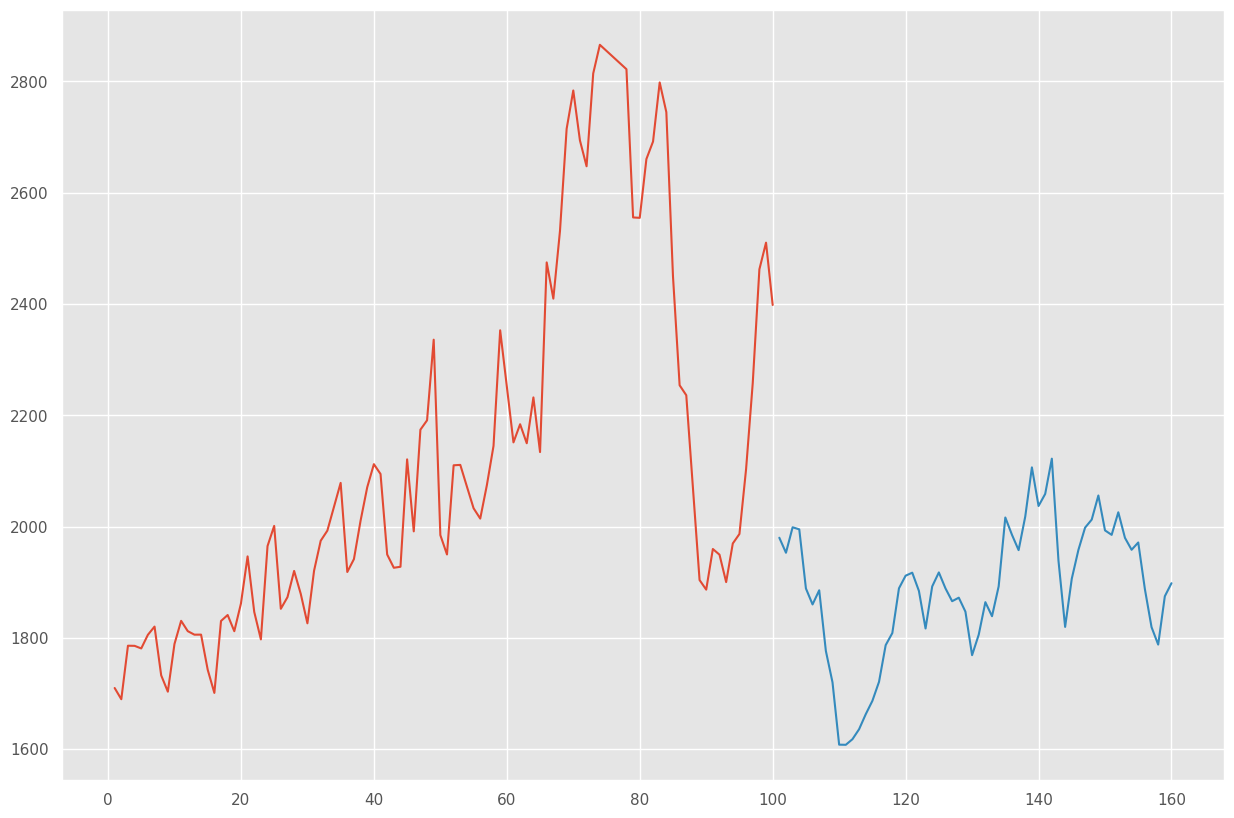

In [ ]:
print(len(y)) # 打印 y 的长度
day_new=np.arange(1,101) # 创建一个从 1 到 100 的数组，表示新的天数
# 只修改数字：将 131 修改为 161
day_pred=np.arange(101, 161 ) # 创建一个从 101 到 160 的数组，表示预测的天数
plt.figure(figsize = (15,10)) # 创建一个大小为 15x10 的图形
plt.plot(day_new,scaler.inverse_transform(y[193:])) # 绘制新的天数和对应逆变换后的 y 值的曲线
plt.plot(day_pred,scaler.inverse_transform(lst_output)) # 绘制预测的天数和对应逆变换后的预测值的曲线
print(scaler.inverse_transform(lst_output)) # 打印逆变换后的预测值

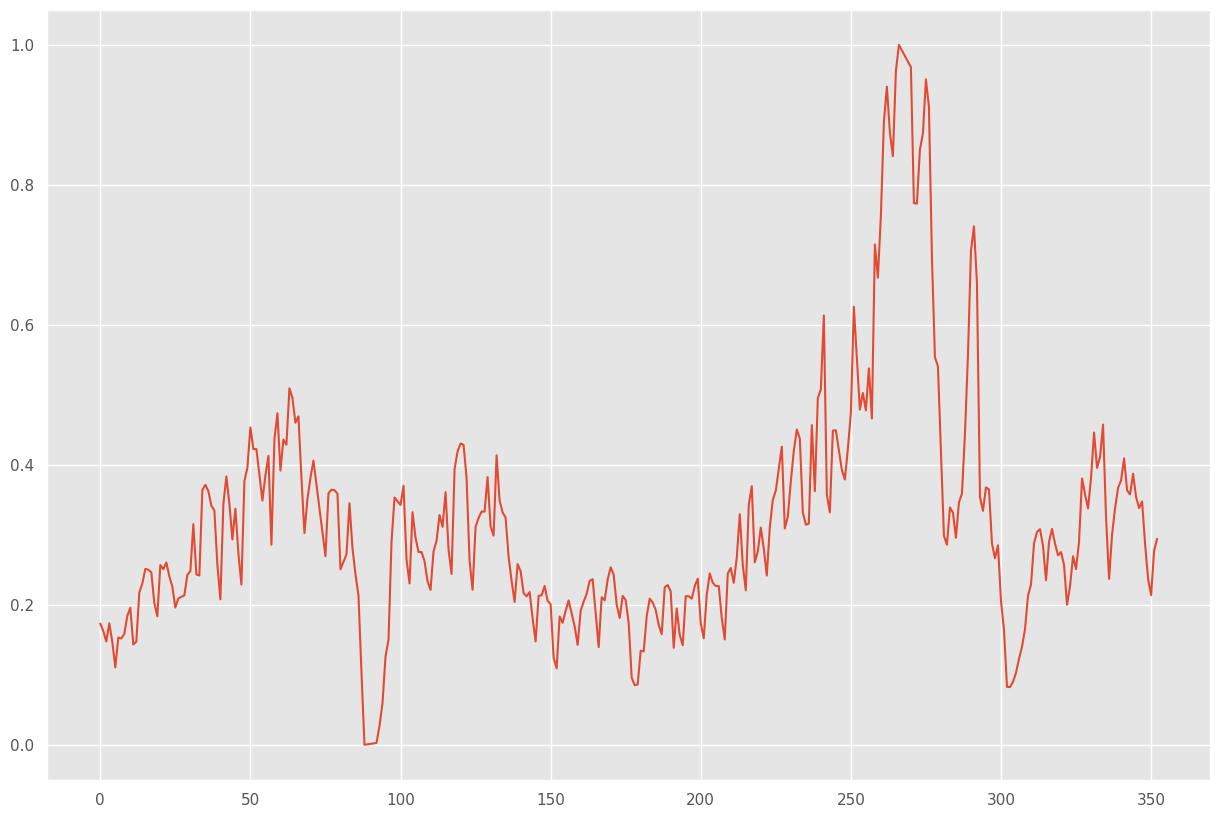

In [ ]:
df3=y.tolist() # 将 y 转换为列表，并赋值给 df3
df3.extend(lst_output) # 将 lst_output 的元素添加到 df3 的末尾
plt.figure(figsize=(15,10)) # 创建一个大小为 15x10 的图形
plt.plot(df3[0:]) # 绘制 df3 从索引 2000 开始的元素的曲线图